# LAPD Crime Data, 2020-2022

In [1]:
# Imports:
# import json, requests
import pprint, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as st
import hvplot.pandas
import numpy as np

In [2]:
# pull all data out of csv files
crime_data_2020 = pd.read_csv("Resources/crime_data_2020.csv")
crime_data_2021 = pd.read_csv("Resources/crime_data_2021.csv")
crime_data_2022 = pd.read_csv("Resources/crime_data_2022.csv")

# set datetime formatting to fields where it is necessary
for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    dat_fr["DATE OCC"] = pd.to_datetime(dat_fr["DATE OCC"])
    dat_fr["Date Rptd"] = pd.to_datetime(dat_fr["Date Rptd"])
    dat_fr['Year Crime Occured'] = dat_fr['DATE OCC'].dt.year

crime_data_2020.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occurred,Month Occurred,Year Crime Occured
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1,2020
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,1,2020
2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,...,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2,2020
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1,2020
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1,2020


In [7]:
crime_data_full_yrs = pd.concat([crime_data_2020, crime_data_2021, crime_data_2022])

crime_data_full_yrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643205 entries, 0 to 234343
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          643205 non-null  int64         
 1   DR_NO               643205 non-null  int64         
 2   Date Rptd           643205 non-null  datetime64[ns]
 3   DATE OCC            643205 non-null  datetime64[ns]
 4   TIME OCC            643205 non-null  int64         
 5   AREA                643205 non-null  int64         
 6   AREA NAME           643205 non-null  object        
 7   Rpt Dist No         643205 non-null  int64         
 8   Part 1-2            643205 non-null  int64         
 9   Crm Cd              643205 non-null  int64         
 10  Crm Cd Desc         643205 non-null  object        
 11  Mocodes             554950 non-null  object        
 12  Vict Age            643205 non-null  int64         
 13  Vict Sex            559350 non-nul

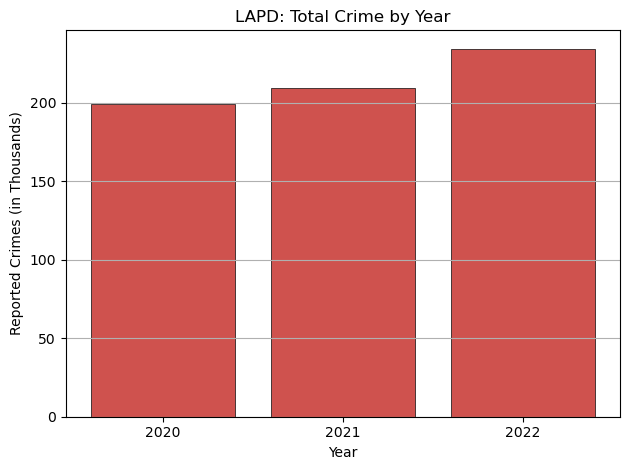

In [85]:
x = crime_data_full_yrs.groupby('Year Occurred',as_index=False).count()
y = x[['Year Occurred', 'DR_NO']].sort_values(by='Year Occurred') / 1000
bar_edgecolor = '#080808'

plt.bar(x['Year Occurred'], y['DR_NO'], edgecolor=bar_edgecolor, linewidth=0.5, color='xkcd:dark coral')
plt.title("LAPD: Total Crime by Year")
plt.xlabel("Year")
plt.ylabel("Reported Crimes (in Thousands)")
plt.xticks([2020, 2021, 2022])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(path.join('Output', 'Total Crime by Year'))
plt.show()

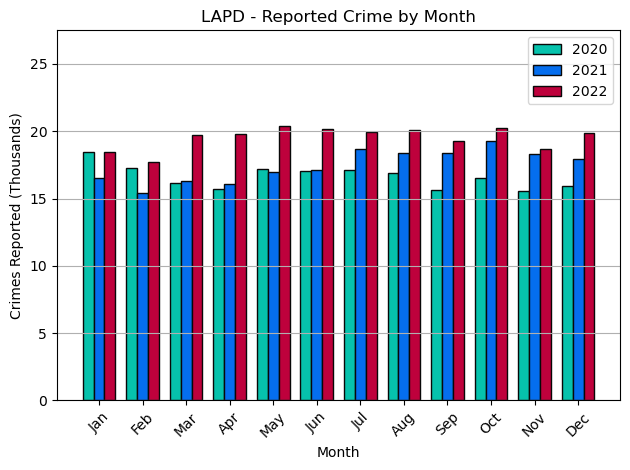

In [161]:
x_ax = crime_data_full_yrs['Month Occurred'].sort_values().unique()
yrs = crime_data_full_yrs['Year Occurred'].sort_values().unique()
y_vals = []
grouped_by_month = crime_data_full_yrs.groupby('Month Occurred', as_index=False).count()
months_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['xkcd:turquoise', 'xkcd:cerulean blue', 'xkcd:rose red']

for iter in range(len(yrs)):
    grouped_by_month = crime_data_full_yrs.loc[crime_data_full_yrs['Year Occurred'] == yrs[iter],['Month Occurred', 'DR_NO']].groupby('Month Occurred',as_index=False).count() / 1000
    y_vals = grouped_by_month.sort_values(by='Month Occurred')
    plt.bar(x_ax - 0.25 + (0.25 * iter), y_vals['DR_NO'], color=colors[iter], width=0.25, edgecolor=bar_edgecolor, linewidth=1)

plt.title("LAPD - Reported Crime by Month")
plt.xlabel("Month")
plt.ylabel("Crimes Reported (Thousands)")
plt.ylim(0,27.5)
plt.xticks(np.arange(1,13), labels=months_abbr, rotation=45)
plt.grid(axis='y')
plt.legend(yrs)
plt.tight_layout()
plt.savefig(path.join('Output', 'Total Crime by Month'))
plt.show()


In [86]:
crime_by_area = crime_data_full_yrs.groupby('AREA NAME', as_index=False)
crime_by_area = crime_by_area['AREA NAME'].value_counts().sort_values('count', ascending=False)
crime_by_area.head()

,AREA NAME,count
1,Central,42413
0,77th Street,40907
12,Pacific,37482
15,Southwest,35906
6,Hollywood,34736


In [88]:
# remove all invalid lat/longs
crime_with_loc = crime_data_full_yrs.loc[crime_data_full_yrs["LAT"] != 0,:]

In [105]:
map_plot_1 = crime_with_loc.sample(5000).hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)

In [107]:
most_committed_crime_2022 = crime_data_2022.groupby(['Crm Cd Desc'], as_index=False)['Crm Cd Desc'].value_counts().sort_values('count', ascending=False)
most_committed_crime_2022.head(10)

,Crm Cd Desc,count
128,VEHICLE - STOLEN,24724
113,THEFT OF IDENTITY,21787
4,BATTERY - SIMPLE ASSAULT,18053
20,BURGLARY FROM VEHICLE,14221
19,BURGLARY,14054
125,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",13343
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12860
115,THEFT PLAIN - PETTY ($950 & UNDER),11353
71,INTIMATE PARTNER - SIMPLE ASSAULT,11157
110,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,10074


In [108]:
id_theft_2022 = crime_data_2022.loc[crime_data_2022["Crm Cd"] == 354,:]

id_theft_2022['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY    21787
Name: count, dtype: int64

In [109]:
id_theft_by_month = []
year = 2020

for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    for i in range(1,13):
        id_theft_by_month.append([len(dat_fr.loc[(dat_fr["Crm Cd"] == 354) & (dat_fr["Month Occurred"] == i),:])])
    year += 1

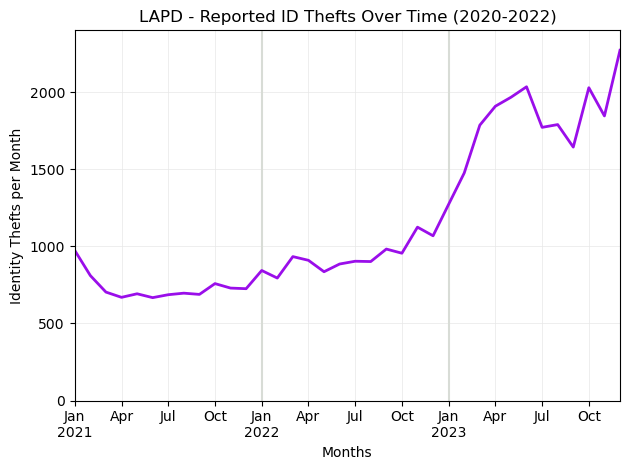

In [216]:
fig, ax = plt.subplots()
x_ax = range(1,37)
# plotting vlines first so they don't go over line
plt.vlines((13, 25), 0, 2400, linestyles='solid', colors=['xkcd:light grey'])
plt.plot(x_ax, id_theft_by_month, color='xkcd:violet', linewidth=2)
plt.title("LAPD - Reported ID Thefts Over Time (2020-2022)")
plt.xlim(1, 36)
plt.ylim(0, 2400)

# for loop to fill out tick markers
mo_ticks = np.arange(1,37,3)
mo_labels = []
cur_year = 2020
for tick in mo_ticks:
    t_mod = tick % 12
    if t_mod == 1:
        cur_year += 1
        mo_labels.append(f'Jan\n{cur_year}')
    elif t_mod == 4:
        mo_labels.append(f'Apr')
    elif t_mod == 7:
        mo_labels.append(f'Jul')
    elif t_mod == 10:
        mo_labels.append(f'Oct')  

plt.xticks(ticks=mo_ticks, labels=mo_labels)

# ax.set_xticks(np.arange(1, 37, 12), minor=False)
# ax.set_xticks(np.arange(1, 37, 3), minor=True)

ax.grid(which='major', color = '#E8E8E8', linewidth = 0.5)
ax.xaxis.grid(True, which='both')



plt.grid(axis='y', color='#E8E8E8')
plt.xlabel("Months")
plt.ylabel("Identity Thefts per Month")
plt.tight_layout()
plt.savefig(path.join('Output', 'ID Theft'))
plt.show()

In [171]:
# Creatie a dictionary for crime descriptions and their corresponding code
crm_types = crime_data_full_yrs['Crm Cd Desc'].unique()
crm_types

crm_cd_dict = {}

for type_of_crm in crm_types:
    crm_cd_dict[type_of_crm] = crime_data_full_yrs.loc[crime_data_full_yrs['Crm Cd Desc'] == type_of_crm,['Crm Cd']]['Crm Cd'].unique()[0]

In [176]:
# create series from crime code dictionary
crm_cd_series = pd.Series(crm_cd_dict).sort_values(ascending=True)

crm_cd_series.to_csv(path.join('Resources', 'Crime Code Lookup.csv'))

crm_cd_series.head()

CRIMINAL HOMICIDE          110
MANSLAUGHTER, NEGLIGENT    113
RAPE, FORCIBLE             121
RAPE, ATTEMPTED            122
ROBBERY                    210
dtype: int64

In [203]:
# create DF that drops all crimes without mocodes
crimes_with_mocodes = crime_data_full_yrs[crime_data_full_yrs["Mocodes"].notna()]

# grab all crimes with mocode '9999', which is 'Indistinctive MO' which we were curious about looking at
# Also drop crimes without a valid location so we can map them
crimes_unknown_mo = crimes_with_mocodes.loc[(crimes_with_mocodes["Mocodes"].str.contains("9999")) & (crimes_with_mocodes["LAT"]!=0),['DATE OCC', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Status Desc', 'LAT', 'LON', 'AREA NAME']]

In [178]:
map_plot_3 = crimes_unknown_mo.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)

In [193]:
# grab homicide crimes according to crime code (attempted and successful)
homicide_codes=[110]
homicide_crimes = crime_data_full_yrs.loc[crime_data_full_yrs["Crm Cd"].isin(homicide_codes),:]
homicide_crimes.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occurred,Month Occurred,Year Crime Occured
3204,3204,200218817,2020-12-20,2020-12-20,1308,2,Rampart,295,1,110,...,998.0,NaN,NaN,1200 VENICE BL,NaN,34.0424,-118.2810,2020,12,2020
3231,3231,200416099,2020-12-19,2020-12-19,1719,4,Hollenbeck,464,1,110,...,NaN,NaN,NaN,200 S SOTO ST,NaN,34.0445,-118.2116,2020,12,2020
4612,4612,200504437,2020-01-10,2020-01-10,330,5,Harbor,567,1,110,...,NaN,NaN,NaN,800 S BEACON ST,NaN,33.7369,-118.2804,2020,1,2020
6112,6112,200410989,2020-07-20,2020-07-20,2230,4,Hollenbeck,499,1,110,...,998.0,NaN,NaN,BESWICK,CALZONA ST,34.0205,-118.1957,2020,7,2020
9278,9278,201113525,2020-09-12,2020-09-12,1200,11,Northeast,1137,1,110,...,998.0,NaN,NaN,600 N AVENUE 50,NaN,34.1109,-118.2016,2020,9,2020


In [194]:
homicide_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 3204 to 234269
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1142 non-null   int64         
 1   DR_NO               1142 non-null   int64         
 2   Date Rptd           1142 non-null   datetime64[ns]
 3   DATE OCC            1142 non-null   datetime64[ns]
 4   TIME OCC            1142 non-null   int64         
 5   AREA                1142 non-null   int64         
 6   AREA NAME           1142 non-null   object        
 7   Rpt Dist No         1142 non-null   int64         
 8   Part 1-2            1142 non-null   int64         
 9   Crm Cd              1142 non-null   int64         
 10  Crm Cd Desc         1142 non-null   object        
 11  Mocodes             1132 non-null   object        
 12  Vict Age            1142 non-null   int64         
 13  Vict Sex            1142 non-null   object      

In [198]:
hom_sample = homicide_crimes.loc[homicide_crimes['LAT'] != 0,['Crm Cd', 'LAT', 'LON']]
map_plot_hom = hom_sample.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=700,
                                    frame_height=500,
                                    # color="Crm Cd"
)

map_plot_hom

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]

In [206]:
robbery_codes=[210,220]
robberies_w_mocodes_df = crimes_with_mocodes.loc[(crimes_with_mocodes["Crm Cd"].isin(robbery_codes)),['Crm Cd', 'LAT', 'LON', 'Mocodes']]
gun_robberies = robberies_w_mocodes_df.loc[robberies_w_mocodes_df["Mocodes"].str.contains("0302"),:]
gun_robberies.head()


,Crm Cd,LAT,LON,Mocodes
87,210,34.0467,-118.2485,2004 0913 0344 0334 0302 1402 1202
120,210,34.0433,-118.2377,0305 1309 0355 0334 0302 0344 1822
135,210,34.0215,-118.3393,1822 0342 1100 0334 0302 0430 1300 1309 1407 1409
472,210,34.0377,-118.2607,0344 0334 1311 1302 1822 1218 0302 1309 2024 0916
747,210,34.0389,-118.2643,0340 0334 0302 0355 0344 0377 1822


In [207]:
map_plot_robberies = gun_robberies.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="EsriImagery",
                                    frame_width=700,
                                    frame_height=500,
                                    color="Crm Cd"
                                    )
map_plot_robberies

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (Crm Cd)

In [209]:
# Get Victim Sex breakdown in the data
crime_data_full_yrs["Vict Sex"].value_counts()

Vict Sex
M    268249
F    238520
X     52506
H        75
Name: count, dtype: int64

In [210]:
# Get Victim Age breakdown in the data
crime_data_full_yrs["Vict Age"].value_counts()

Vict Age
 0      154675
 30      14866
 35      14451
 29      14147
 31      14088
         ...  
 98         51
 97         46
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [212]:
print("Average Victim Age:", crime_data_full_yrs["Vict Age"].mean())

Average Victim Age: 30.04714826532754


In [215]:
zero_age = crime_data_full_yrs.loc[crime_data_full_yrs["Vict Age"] == 0,:]
zero_age['Vict Age'].count()

154675

### Due to some reports containing a zero age, we have a few options to consider for the data.

- Because of the sizable amount, we can replace all 0 values to a random range within the mean (30) like 28-32.
- The option to outright discard the data is there, but losing 154,675 data points along with crimes such as vehicular theft and burglary, it is a very big choice.
- We can always just leave it at 0 and determine why it was reported as age 0. Possibly because there were multiple victims in the scene.

In [236]:
#pulling only ID Theft 2020
ID_theft_2020 = crime_data_2020.loc[crime_data_2020["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2020['Vict Age'].max()
min_age= ID_theft_2020['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2020.loc[ID_theft_2020["Vict Age"] < 1,:]
print(len(age_zero))
#just want ages >1
ID_theft_2020 = ID_theft_2020.loc[ID_theft_2020["Vict Age"] >1,:]

max age: 99
min age: -2
162


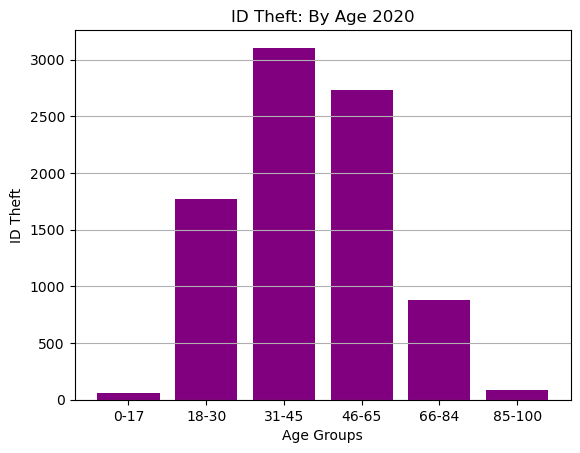

In [232]:
bins = [0, 17.9, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-17", "18-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2020['ID Theft Victim Age'] = pd.cut(ID_theft_2020['Vict Age'],bins, labels=labels,include_lowest=True)
x = ID_theft_2020.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2020")
plt.xlabel("Age Groups")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

In [234]:
#pulling only ID Theft 2021
ID_theft_2021 = crime_data_2021.loc[crime_data_2021["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2021['Vict Age'].max()
min_age= ID_theft_2021['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2021.loc[ID_theft_2021["Vict Age"] < 1,:]
print(len(age_zero))
#just want ages >1
ID_theft2021 = ID_theft_2021.loc[ID_theft_2021["Vict Age"] >1,:]

max age: 99
min age: -1
293


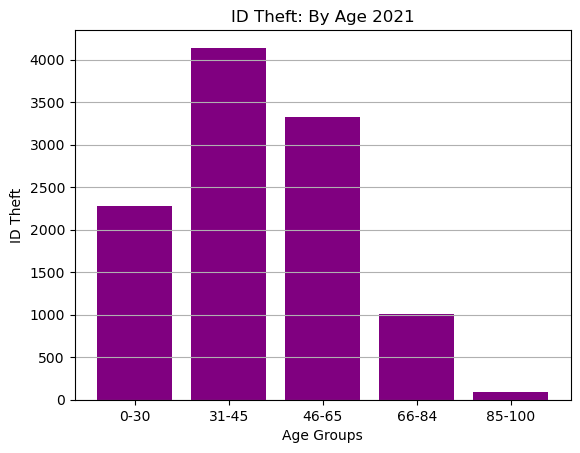

In [230]:
bins = [0, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2021['ID Theft Victim Age'] = pd.cut(ID_theft_2021['Vict Age'],bins, labels=labels,include_lowest=True)
x = ID_theft2021.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2021")
plt.xlabel("Age Groups")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

In [235]:
#pulling only ID Theft 2022
ID_theft_2022 = crime_data_2022.loc[crime_data_2022["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2022['Vict Age'].max()
min_age= ID_theft_2022['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2022.loc[ID_theft_2022["Vict Age"] < 1,:]
print("ID thefts with zero age:",len(age_zero))
#just want ages >1
ID_theft_2022 = ID_theft_2022.loc[ID_theft_2022["Vict Age"] >1,:]

max age: 99
min age: -1
ID thefts with zero age: 272


In [225]:
bins = [0, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2022['ID Theft Victim Age'] = pd.cut(ID_theft_2022['Vict Age'], bins, labels=labels,include_lowest=True)
ID_theft_2022[["Crm Cd Desc",'Vict Age','ID Theft Victim Age']].head()

,Crm Cd Desc,Vict Age,ID Theft Victim Age
9,THEFT OF IDENTITY,29,0-30
22,THEFT OF IDENTITY,31,31-45
35,THEFT OF IDENTITY,33,31-45
39,THEFT OF IDENTITY,27,0-30
42,THEFT OF IDENTITY,38,31-45


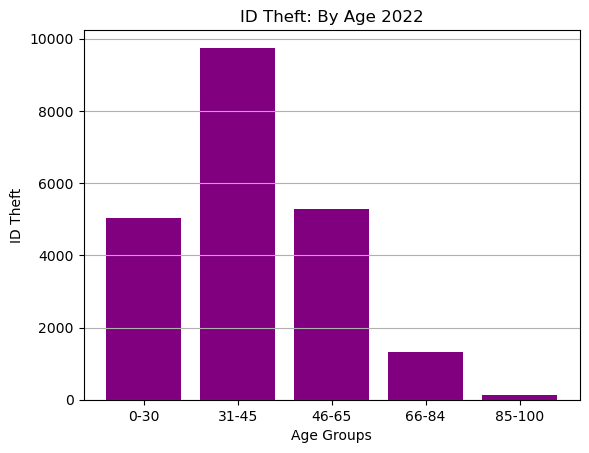

In [220]:
x = ID_theft_2022.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2022")
plt.xlabel("Age Group")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

43.48112114894603
41.0
ModeResult(mode=32, count=257)


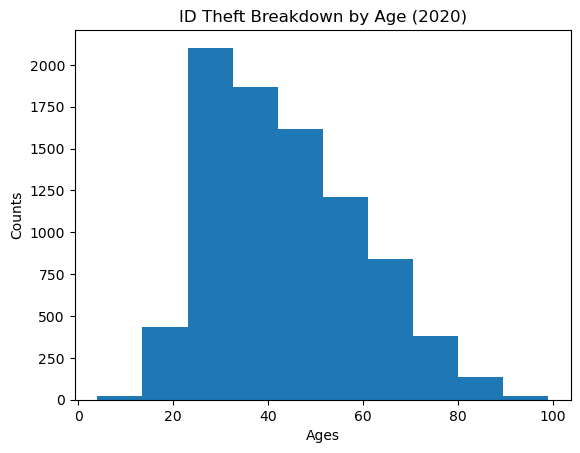

NormaltestResult(statistic=435.9814796796567, pvalue=2.1272796303705668e-95)


In [237]:
age2020 = ID_theft_2020['Vict Age']
mean_numpy = np.mean(age2020)
median_numpy = np.median(age2020)
mode_scipy = st.mode(age2020)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2020)
plt.title('ID Theft Breakdown by Age (2020)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2020))

42.97555125011532
40.0
ModeResult(mode=32, count=329)


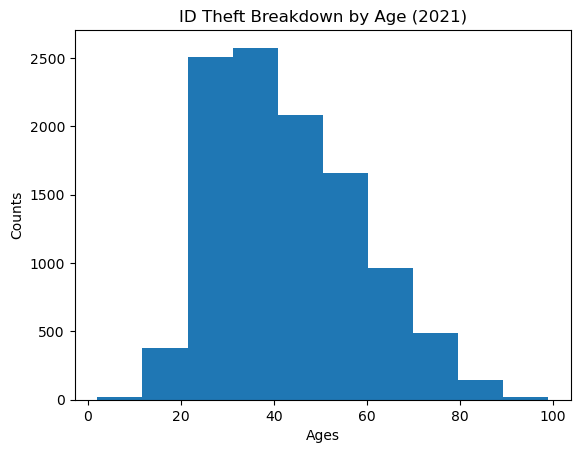

NormaltestResult(statistic=572.3274571441598, pvalue=5.256198528091306e-125)


In [238]:
age2021 = ID_theft2021['Vict Age']
mean_numpy = np.mean(age2021)
median_numpy = np.median(age2021)
mode_scipy = st.mode(age2021)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2021)
plt.title('ID Theft Breakdown by Age (2021)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2021))

40.301789449221474
37.0
ModeResult(mode=30, count=822)


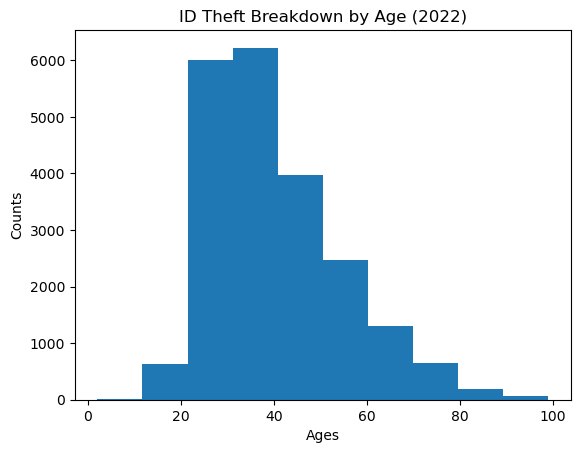

NormaltestResult(statistic=2517.526218697612, pvalue=0.0)


In [239]:
age2022 = ID_theft_2022['Vict Age']
mean_numpy = np.mean(age2022)
median_numpy = np.median(age2022)
mode_scipy = st.mode(age2022)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2022)
plt.title('ID Theft Breakdown by Age (2022)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2022))